In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import ptitprince as pt
import seaborn as sns
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures
import textstat

In [15]:
mergedDataBaseFile="Merged_DB.csv"
merged=pd.read_csv(mergedDataBaseFile)

In [16]:
merged['has_transitions'].dtype

dtype('bool')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


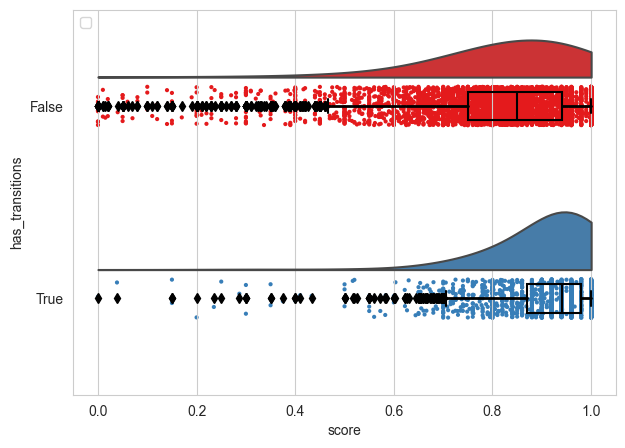

In [17]:
transitionsDF=merged[['has_transitions','score']]

f, ax=plt.subplots(figsize=(7,5))
dy="has_transitions"; dx="score"; ort="h";pal="Set1"

ax=pt.half_violinplot(x=dx,y=dy,data=transitionsDF,palette=pal,bw=.6,cut=0.,scale="area",width= .6,inner=None,orient=ort)

ax=sns.stripplot( x = dx, y = dy, data = transitionsDF, palette = pal,
 edgecolor = "white", size = 3, jitter = 1, zorder = 0,
 orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = transitionsDF, color = "black", 
 width = .15, zorder = 10, showcaps = True,
 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
 whiskerprops = {'linewidth':2, "zorder":10},
 saturation = 1, orient = ort)

ax.legend(loc='upper left')
plt.savefig('original_dist.png')
plt.show()

In [18]:
main_file="C:/Users/jlsan/OneDrive/JEP_LARGE_DATASET/DATA.csv"
data=pd.read_csv(main_file)
pd.set_option('display.max_colwidth', None)

In [19]:
data_df=pd.DataFrame(data)
data_df.head(1)

INDEX  \
0  A001-00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [20]:
def calcular_indices(texto):
    indices = {
        'Flesch Reading Ease': textstat.flesch_reading_ease(texto),
        'Flesch-Kincaid Grade Level': textstat.flesch_kincaid_grade(texto),
        'Gunning FOG Index': textstat.gunning_fog(texto),
        'SMOG Index': textstat.smog_index(texto),
        'Automated Readability Index': textstat.automated_readability_index(texto),
        'Coleman-Liau Index': textstat.coleman_liau_index(texto),
        'Linsear Write Formula': textstat.linsear_write_formula(texto),
        'Dale-Chall Readability Score': textstat.dale_chall_readability_score(texto)
    }
    return indices
    

In [21]:
resultados=data_df['TEXT'].apply(calcular_indices)
resultados_df = resultados.apply(pd.Series)
df = pd.concat([data_df, resultados_df], axis=1)

In [23]:
df.head()

INDEX  \
0  A001-00   
1  A001-01   
2  A001-02   
3  A001-03   
4  A001-04   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [28]:
df.columns

Index(['INDEX', 'TEXT', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level',
       'Gunning FOG Index', 'SMOG Index', 'Automated Readability Index',
       'Coleman-Liau Index', 'Linsear Write Formula',
       'Dale-Chall Readability Score'],
      dtype='object')

In [34]:
positions1=[2,3,4,5,6,7,8,9]
positions2=[5,6,7]
positions3=[8,9]
COLUMNS1=df.iloc[:,positions1].columns
COLUMNS2=df.iloc[:,positions2].columns
COLUMNS3=df.iloc[:,positions3].columns
col_series1=pd.Series(COLUMNS1)
col_series2=pd.Series(COLUMNS2)
col_series3=pd.Series(COLUMNS3)

In [32]:
print(col_series)

0             Flesch Reading Ease
1      Flesch-Kincaid Grade Level
2               Gunning FOG Index
3                      SMOG Index
4     Automated Readability Index
5              Coleman-Liau Index
6           Linsear Write Formula
7    Dale-Chall Readability Score
dtype: object


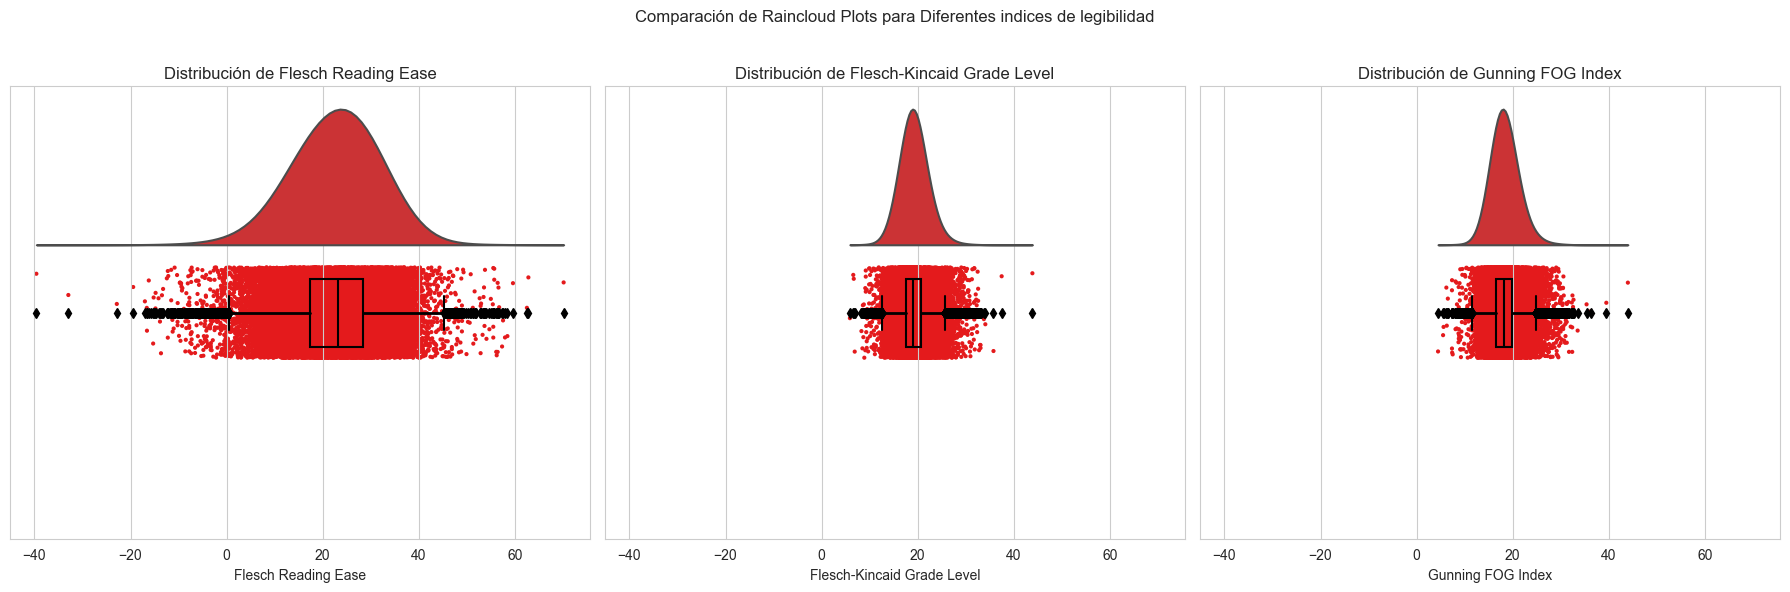

In [35]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS1):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index1.png')
plt.show()

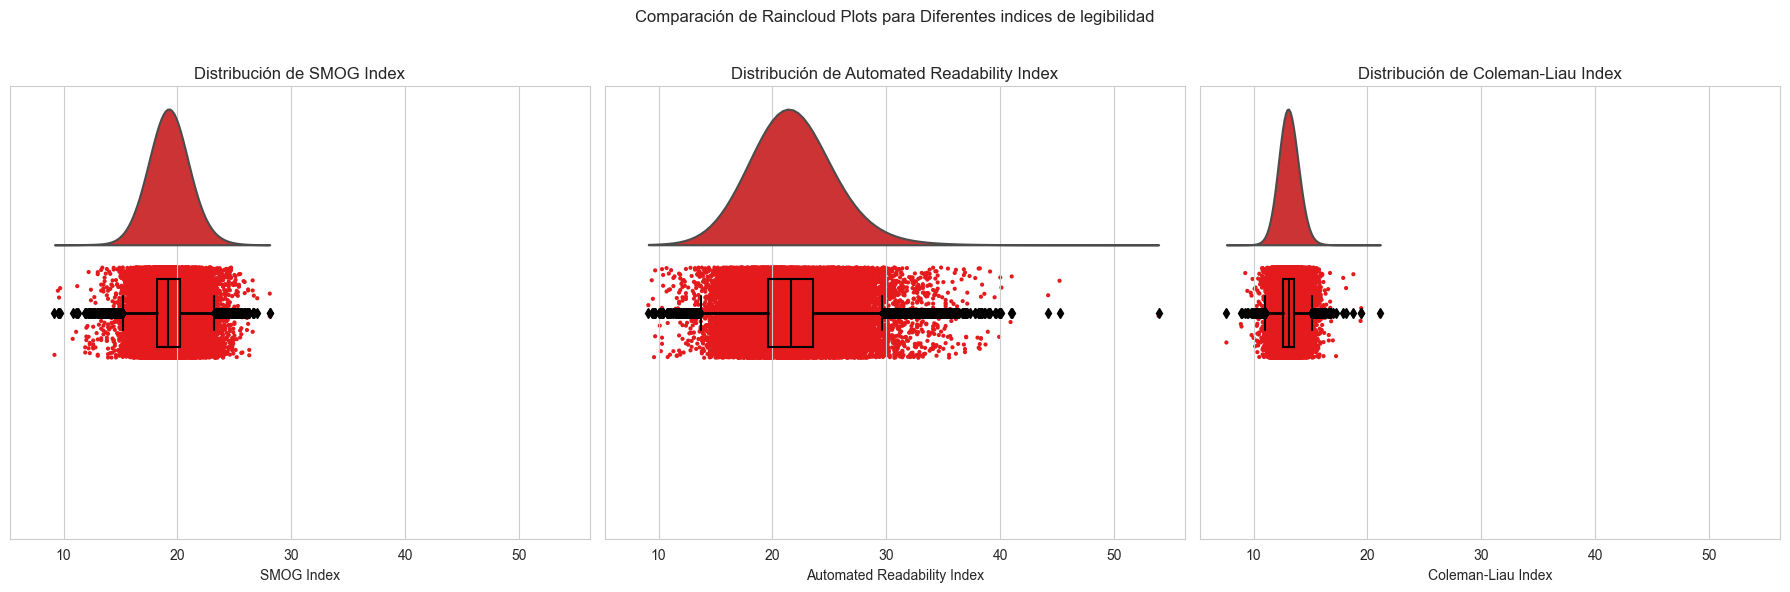

In [36]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS2):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index2.png')
plt.show()

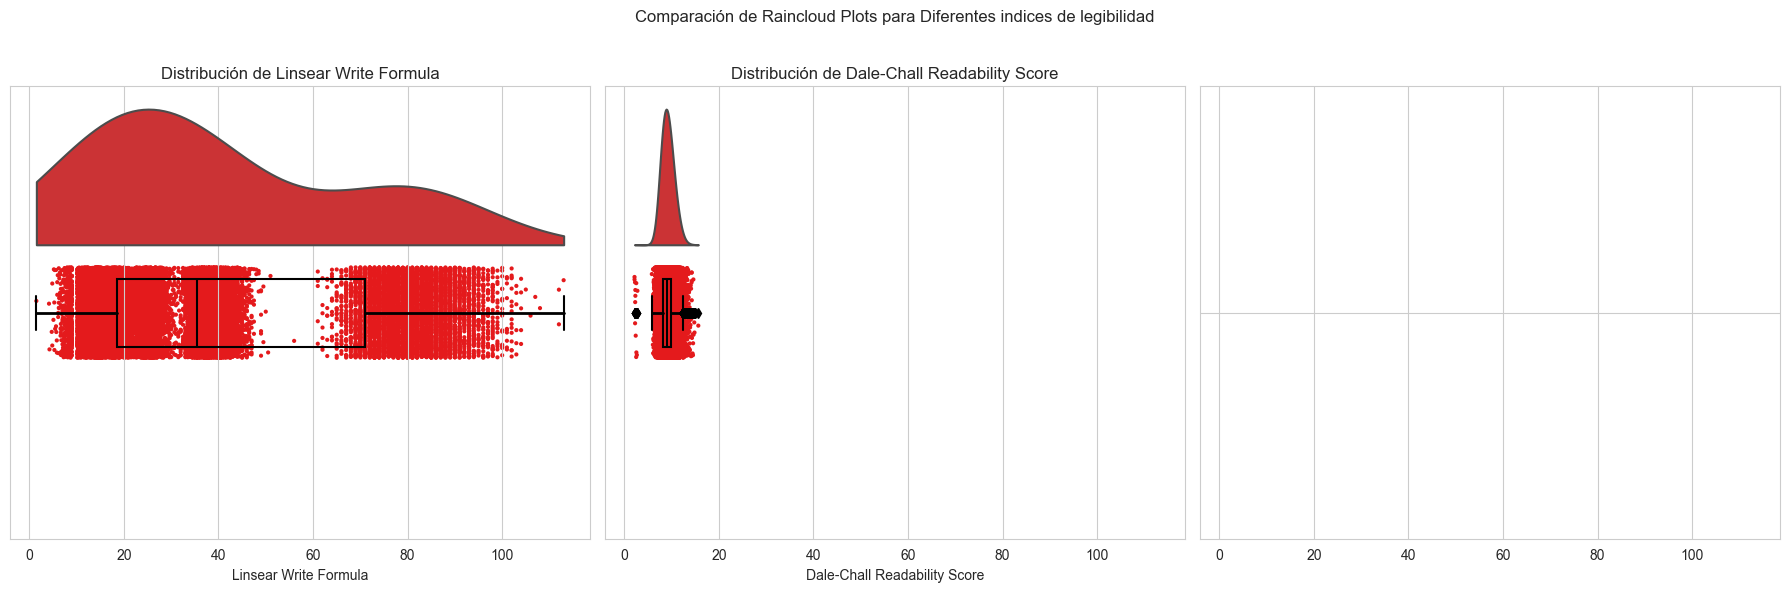

In [37]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS3):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index3.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


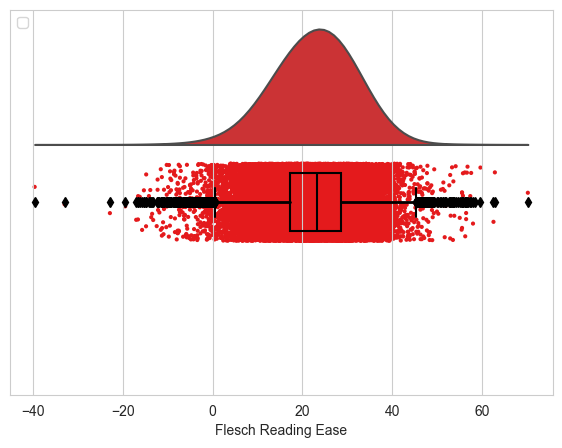

In [25]:
f, ax=plt.subplots(figsize=(7,5))
dx="Flesch Reading Ease"; ort="h";pal="Set1"

ax=pt.half_violinplot(x=dx,y=None,data=df,palette=pal,bw=.6,cut=0.,scale="area",width= .6,inner=None,orient=ort)

ax=sns.stripplot( x = dx, data = df, palette = pal,
 edgecolor = "white", size = 3, jitter = 1, zorder = 0,
 orient = ort)
ax=sns.boxplot( x = dx, data = df, color = "black", 
 width = .15, zorder = 10, showcaps = True,
 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
 whiskerprops = {'linewidth':2, "zorder":10},
 saturation = 1, orient = ort)

ax.legend(loc='upper left')
#plt.savefig('original_dist.png')
plt.show()